# Funkcija gubitka 

<center><img src="Images/V5_banner.png" width="700" height="700"/></center>

U drugoj vježbi pokazano je da se rješenje većine problema strojnog učenja može svesti na 

* Ulazne podatke 

* Odabir modela 

* **Funkcija cilja**

* Optimizacija modela

Funkcija cilja, odnosno funkcija gubitka, ili funkcija dobitka, pa čak i funkcija dobrote označava mjeru kojom mjerimo uspješnost modela te se optimizacijom dovodi u svoj minimum ili maksimum (ovisno o problemu). Do sada smo se upoznali sa metodom najmanjih kvadrata kao funkcijom cilja, a kroz ovu vježbu fokus će biti postavljen na drugim funkcijama cilja i njihovom modeliranju.

---

## Modeliranje funkcije cilja

Svaki skup podataka u učenju pod nadzorom može se prikazati kao skup parova $(x_i, y_i)$ pri čemu je $i \in N$ i predstavlja prikupljeni skup podataka. Stoga za neki model koji se može prikazati kao funkcija $f[x, \phi]$ vrijedi preslikavanje $\hat{y_i} = f(x, \theta)$ pri čemu je $\hat{y_i}$ aproksimacija $y_i$ vrijednosti. Promatrajući $y_i$ - dakle stvarnu vrijednost, ona mora imati visoku vjerojatnost unutar svoje distribucije $Pr(y_i|\theta_i)$. Odnosno, cilj je optimizirati parametre $\phi$ tako da se maximizira kombinirana distribucija $Pr(y_i|x_i)$ za sve uzorke unutar skupa podataka:

\begin{align}
\hat{\phi}
&= \arg\max_{\phi} \left[ \prod_{i=1}^{I} \Pr(y_i \mid x_i) \right] \\
&= \arg\max_{\phi} \left[ \prod_{i=1}^{I} \Pr(y_i \mid \theta_i) \right] \\
&= \arg\max_{\phi} \left[ \prod_{i=1}^{I} \Pr\!\big(y_i \mid f(x_i,\phi)\big) \right]
\end{align}

Budući da tražimo najbolje parametere koji će dati optimalne rezultate, kaže se da tražimo *maximum likelihood*, pritom imamo dvije pretpostavke:

1. Podaci dolaze iz iste distribucije,
2. Uvjetna vjerojantnost $Pr(y_i|x_i)$ je nezavizna s obzirom na dani ulazni podatak (jedan uzorak ne utječe na drugi), odnosno vrijedi dekompozicija:

\begin{align}
Pr(y_1, y_2, \ldots, y_I \mid x_1, x_2, \ldots, x_I)
= \prod_{i=1}^{I} Pr(y_i \mid x_i).
\end{align}

---

<font color='green'>
    
## Primjer

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>


Sljedeći programski kod demonstira vizualno predikciju distribucije na regresijskom problemu **bike_rental** skupa podataka. Za svako vrijednost $x$ model predviđa distribuciju $P(y|x)$ u skupu $y \in \mathbb{R}$ Proučite kako se parametar mijenja u ovisnosti o promjeni vrijednosti x. Za aproksimaciju je postavljena Normalna distribucija. Minimizacija funkcije cilja zapravo znači maksimiziranje vjerojatnosti istinitih podataka $y_i$ za danu distribuciju definiranu putem odgovarajućih ulaznih podataka $x_i$.

In [3]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Pokretanje skripte 
from Skripte.Vjezba5.dataloader import inspect_dataset
from Skripte.Vjezba5.plot import create_scatter_x_band_widget


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
create_scatter_x_band_widget(path_to_csv = "Skripte/Vjezba5/day_bikes_rental.csv")

## Maximum likelihood, log-liklihood, minimizacija log-liklihood-a

Maximum likelihood predstavljen u prethodnoj formuli ima jednu veliku manu, a to je da se računa putem množenja distribucija vjerojatnosti po svim točkama ulaznog skupa podataka što može rezultirati izrazito malim vrijednostima -- koje u računalu mogu nestati zbog reprezentacije decimalnih brojeva u memoriji. Kako bi se riješio ovaj problem, primjenjuje se logaritamska funkcija te se stvara **log-likelihood** estimacija:


\begin{aligned}
\hat{\phi}
&= \arg\max_{\phi} \left[ \prod_{i=1}^{I} \Pr(y_i \mid f(x_i,\phi)) \right] \\
&= \arg\max_{\phi} \left[ \log \left( \prod_{i=1}^{I} \Pr(y_i \mid f(x_i,\phi)) \right) \right] \\
&= \arg\max_{\phi} \left[ \sum_{i=1}^{I} \log \Pr(y_i \mid f(x_i,\phi)) \right]
\end{aligned}

---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Navedite svojstva logaritamske *log(x)* funkcije te pokažite kako ista funkcija djeluje na neku drugu funkciju. Što se mijenja a što ostaje isto?. Koja su svojstva logaritamske funkcije? Nacrtajte funkciju!

<font color='green'>



In [ ]:
# Knjižnice
import numpy as np
import matplotlib.pyplot as plt
# Kod za logaritamsku funkciju. 

# x-domena -1-1, neka funkcija f koja zavisi o x-u, logaritamska funkcija od y-na dakle log(f(x))

---
#### Što Model predviđa?

## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Za početak, pokrenite idući kod koji ima sve parametre fiksirane na neku vrijednost osim $\psi_0$ - bias parametra kojeg možemo podeštavati. Isto tako može se prilagođavati $\sigma$ vrijednost koja pokazuje određenu neizvjesnost oko predviđanja modela. Dakle, model zapravo predviđa $\mu$ distribucije za dani podata uz pretpostavku da je $\sigma$ konstanta (ona se ne predviđa niti računa).



In [4]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Pokretanje skripte 
from Skripte.Vjezba5.plot import model_over_dataloader_widget
#inspect_dataset("Skripte/Vjezba3/day_bikes_rental.csv")

model_over_dataloader_widget("Skripte/Vjezba5/day_bikes_rental.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Usporedba maximum likelihood, negative loglikelihood i least squares loss

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti **Skripte/loss_funkcije.py** možete pronaći sljedeće funkcije koje je potrebno implementirati:

* *compute_sum_of_squares* -- implementira iduću jednadžbu: $L[\phi] = \sum_{i=1}^{I} \left( y_i - f(x_i, \phi) \right)^2$ gdje vrijedi $\hat{y_i} = f(x_i, \phi)$. Metoda računa razliku kvadrata predikcija i istinitih oznaka. 

* *compute_likelihood* -- implementira maximum likelihood koji je dan jednadžbom: $cl: \left[ \prod_{i=1}^{I} \Pr\!\big(y_i \mid f(x_i,\phi)\big) \right]$ pri čemu za aproksimaciju $Pr(\cdot)$ koristimo Normalnu univariatnu distirbuciju (Gaussova distribucija): $\Pr(y_i \mid x_i, \phi)
= \frac{1}{\sqrt{2\pi}\,\sigma}
  \exp\!\left(
    -\frac{\big(y_i - f(x_i,\phi)\big)^2}{2\sigma^2}
  \right)$ pri čemu vrijedi $\mu = f(x_i,\phi)$ i $\sigma$ je postavljena na konstantnu vrijednost, stoga se može pisati i $\Pr(y_i \mid x_i, \phi) = \Pr(y_i | \mu, \sigma)$.

* *compute_negative_log_likelihood* - implementira sljedeću jednadžbu: $nll = \left[ - \sum_{i=1}^{I} \log \Pr(y_i \mid f(x_i,\phi)) \right]$ pri čemu se $f(x_i,\phi)$ estimira pomoću Gaussove distribucije.

* *normal_distribution* je normalna gausova distribucija dana jednadžbom:
$\mathcal{N}(y \mid \mu, \sigma^2)
= \frac{1}{\sqrt{2\pi\,\sigma^2}}
  \exp\!\left(
    -\frac{(y - \mu)^2}{2\sigma^2}
  \right)$
pri čemu vrijedi: $\Pr(y_i \mid x_i, \phi)
= \frac{1}{\sqrt{2\pi}\,\sigma}
  \exp\!\left(
    -\frac{\left(y_i - f(x_i,\phi)\right)^2}{2\sigma^2}
  \right)$ odnosno explicitno ako se koristi srednja vrijednost: $\Pr(y \mid \hat{y}, \sigma)
= \frac{1}{\sqrt{2\pi}\,\sigma}
  \exp\!\left(
    -\frac{(y - \hat{y})^2}{2\sigma^2}
  \right)$.


Sljedeći programski kod će ispitati rade li Vaše implementacije funkcija ispravno.

---

In [10]:
# Učitavanje knjižica
from Skripte.Vjezba5.loss_funkcije import compute_likelihood, compute_sum_of_squares, compute_negative_log_likelihood
from Skripte.Vjezba5.dataloader import *
from Skripte.Vjezba5.models import *
import numpy as np

# Prikupljanje podataka
_dataset = bikeRentalDataset(path_to_csv="Skripte/Vjezba5/day_bikes_rental.csv",
                                 input_label="temp",
                                 target_label="cnt",
                                 normalizacija=True)

_dataloader = ordinary_dataloader(dataset=_dataset, batch_size=1)

# Model
_model = model_1_3_1(psi0 = 0.202)

# Učitavanje svih podataka u y i x te predikcija modela
_xs, _ys, _mu_pred = [], [], []
for _x_batch, _y_batch in _dataloader:
    _mu_pred.append(float(_model(_x_batch).squeeze().item()))
    # očekujemo skalarne tenzore po sample-u → squeeze -> item
    _xs.append(float(_x_batch.squeeze().item()))
    _ys.append(float(_y_batch.squeeze().item()))

_x = np.asarray(_xs, dtype=float)
_y_train = np.asarray(_ys, dtype=float)
_mu = np.asarray(_mu_pred, dtype=float)

# Izracun
_sum_of_squares = compute_sum_of_squares(_y_train, _mu)
_likelihood = compute_likelihood(_y_train, _mu, sigma=0.35)
_nll = compute_negative_log_likelihood(_y_train, _mu, sigma=0.35)
# Let's double check we get the right answer before proceeding
print("Sum of Squares: correct answer = %6.3f, Your answer = %6.3f"%(28.4023, _sum_of_squares))
print("Likelihood: correct answer = %6.15f, Your answer = %6.15f"%(0.000000001601738, _likelihood))
print("Negative log likelihood: correct answer = %6.3f, Your answer = %6.3f"%(20.252, _nll))

Sum of Squares: correct answer = 28.402, Your answer =  0.000
Likelihood: correct answer = 0.000000001601738, Your answer = 0.000000000000000
Negative log likelihood: correct answer = 20.252, Your answer =  0.000


---

## Usporedba funkcija cijena
<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Bitno je uočiti da u prethodnom programskom kodu model (1-3-1 neuronska mreža) je imao sve parametre fiksirane uključujući i $\psi_0 = 0.202$. Sljedeći programski kod koristi vaše implementirane funkcije gubitka i iscrtava ih za različite vrijednosti parametra $\psi_0 \in \left[-1,1\right]$.

Proučite dobivene krivulje funkcije gubitka te iznesite opažanja. Koje funkcije maksimiziramo a koje minimiziramo i zašto?
Objasnite korake u kreiranju vlasite funkcije gubitka:

1. Odabir prikladne distibucije $Pr(y|\Theta)$ koja definira domenu $y$ temeljem parametara $\Theta$.
2. Postavljanje modela $f[x,\phi]$ koji uči parametre $\Theta$ tako da vrijedi $\Theta=f[x,\phi]$, $Pr(y|\Theta) = Pr(y|f[x,\phi])$
3. Treniranje modela koji minimizira negativni log-likelihood: $\hat{\phi}
=\arg\min_{\phi} \left[ L[\phi] \right] 
= \arg\min_{\phi} \left[ - \sum_{i=1}^{I} \log \Pr(y_i \mid f(x_i,\phi)) \right]$.
4. Kako bi predđali vrijednost na novom uzorku $x_{i+1}$ vraćamo cijelu distribuciju Pr(y|f[x,\hat{\phi}]) ili samo maksimum te distribucije.

I za kraj, možemo li učiti parametar $\sigma$? Kako se to reflektira na graf iz prethodnog primjera?

Best values:
  SSE:  best ψ₀ = -1.0000,  SSE = 0.000000
  L  :  best ψ₀ = -1.0000,  L   = 0.000000e+00
  NLL:  best ψ₀ = -1.0000,  NLL = 0.000000


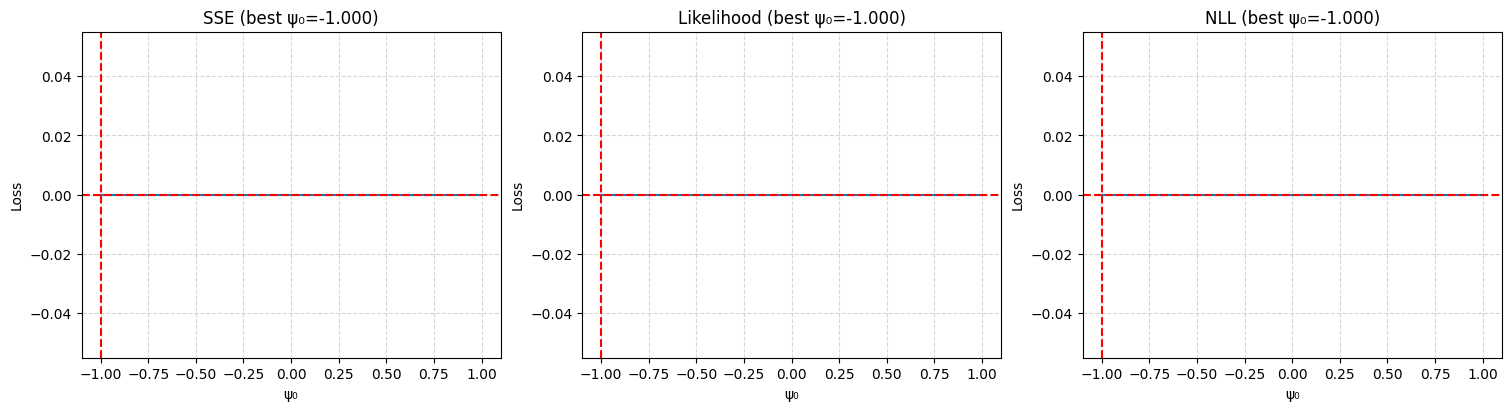

In [9]:
# Pokretanje skripte 
from Skripte.Vjezba5.plot import plot_losses_over_psi0

plot_losses_over_psi0(path_to_csv = "Skripte/Vjezba5/day_bikes_rental.csv")

---
## Binary Cross Entropy loss

<center><img src="Images/V5_diabetes.png" width="700" height="700"/></center>


Do sada smo promatrali regresijski problem u kojem je predviđana vrijednost kontinuirana varijabla. Puno problema iz stvarnog svijeta može se svesti na binarnu klasifikaciju. **Binarna klasifikacija** označava skupinu problema u kojima je izlazna varijabla $y \in \{0,1\}$. Dakle tumačenje može biti da je neko promatrano stanje prisutno ili ne, odnosno pozitivno ili negativno, ili da imamo samo dvije klase koje se mogu prezentirati kao 0 ili 1.

Prilikom modeliranja regresije kao ciljana distribucija svake varijable postavila se Gaussova distribucija (Normalna razdioba) što u slučaju binarne klasifikacije nije moguće. Naime, kako postoje samo dva stanja, što zorno prikazuje i idući primjer, potrebno je upotrijebiti neku drugu distribuciju za modeliranje izlaza. 

Stoga, kako bi se prethodno rješenje prilagodilo binarnoj klasifikaciji potrebno je primjeniti sljdeće dvije promjene:

1. Promjena distribucije iz Normalne u Bernulijevu
2. Limitiranje izlaza neuronske mreže na interval $\hat{y} \in \{ 0-1 \}$ pomoću sigmoidne funkcije.

---

## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Sljedeći programski kod implementira "diabetes_dataset.csv" koji je dostupan na [poveznici](https://www.kaggle.com/datasets/saurabh00007/diabetescsv). Proučite relacije varijabli i odaberite ulaznu i izlaznu varijablu.


In [11]:
# Knjižnice
from Skripte.Vjezba3.plot import create_bike_correlation_widget
inspect_dataset("Skripte/Vjezba5/diabetes_dataset.csv")
# Widget start
create_bike_correlation_widget(path_to_csv = "Skripte/Vjezba5/diabetes_dataset.csv")

/home/franko/Desktop/Nastava2025_2026/StrojnoUčenje/SDSR-StrojnoUcenje/Notebooks/Skripte/Vjezba3
Label      Udio     Missing        Vrijednosti(5)
*****************************************************************
age: 100000 / 100000 (missing: 0) (Vales: [58 48 60 74 46])
gender: 100000 / 100000 (missing: 0) (Vales: ['Male' 'Female' 'Other'])
ethnicity: 100000 / 100000 (missing: 0) (Vales: ['Asian' 'White' 'Hispanic' 'Black' 'Other'])
education_level: 100000 / 100000 (missing: 0) (Vales: ['Highschool' 'Graduate' 'Postgraduate' 'No formal'])
income_level: 100000 / 100000 (missing: 0) (Vales: ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High'])
employment_status: 100000 / 100000 (missing: 0) (Vales: ['Employed' 'Unemployed' 'Retired' 'Student'])
smoking_status: 100000 / 100000 (missing: 0) (Vales: ['Never' 'Former' 'Current'])
alcohol_consumption_per_week: 100000 / 100000 (missing: 0) (Vales: [0 1 2 3 6])
physical_activity_minutes_per_week: 100000 / 100000 (missing: 0) (Vales: [215 143

## Implementacija Bernulijeve distribucije

Motivacija iza odabira Bernulijeve distribucije iz prethodnog primjera je poprilično jasna: postoji neka vjerojatnost koja ovisi o ulaznim parametrima da osoba ili ima ili nema dijebetes. Stoga distribucija koja upravo daje 0 ili 1 sa nekom vjerojatnošću je idealna za modeliranja ovog problema. Bernulijeva jednadžba može se zapisati na sljedeći način:

\begin{align}
\Pr(y \mid \lambda) =
\begin{cases}
1 - \lambda, & y = 0,\\[4pt]
\lambda, & y = 1.
\end{cases}
\end{align}

odsnosno kao jednadžba:

\begin{align}
\Pr(y \mid \lambda) = (1 - \lambda)^{\,1-y}\, \lambda^{\,y}
\end{align}

Implementirana neuronska mreža ($f[x, \phi]$) do sada je predviđala $\hat{y}$ u nedefiniranom intervalu jer Normalna razdioba može biti nad bilo kojim intervalom. Sada je potrebno limitirati izlaz neuronske mreže na interval Bernulijeve razdiobe što se elegatno može postići primjenom sigmoidne funkcije na izlaz neuronske mreže:

\begin{align}
\sigma = \text{sig}[z] = \frac{1}{1 + e^{-z}}
\end{align}

Dakle, predviđa se parametar $\lambda$ pa vrijedi sljedeća jednadžba:

\begin{align}
\Pr(y \mid \mathbf{x}) = (1 - \text{sig}(f[\mathbf{x},\phi]))^{\,1-y} \cdot (\text{sig}(f[\mathbf{x},\phi]))^{\,y}
\end{align}

Ukoliko na istu primjenimo negativni log-likelihood dobivamo sljedeću formulaciju, odnosno funkciju cilja:

\begin{align}
L[\phi] = \sum_{i=1}^{I} \left[
-(1 - y_i)\log\left(1 - \text{sig}(f[\mathbf{x}_i,\phi])\right)
- y_i \log\left(\text{sig}(f[\mathbf{x}_i,\phi])\right)
\right]
\end{align}

Uočite da $y_i \in \{0,1\}$ što znači da se uvijek samo jedan dio sume izvršava.

---



## Implementacija

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U skripti **/Skripte/Vjezba5/loss_funkcije_binarne.py** potrebno je implemenitrati sljedeće funkcije:

* *sigmoid* -- implementira jednadžbu sigmoid funkcije: $\sigma = \text{sig}[z] = \frac{1}{1 + e^{-z}}$. Također izračunajte na papiru derivaciju ove funkcije.

* *bernoulli_distribution* -- implementira bernulijevu distribuciju: $\Pr(y \mid \lambda) = (1 - \lambda)^{\,1-y}\, \lambda^{\,y}$

* *compute_likelihood_b* -- implementira likelihood: $cl: \left[ \prod_{i=1}^{I} \Pr\!\big(y_i \mid f[x_i,\phi]\big) \right]$ pri čemu za aproksimaciju $Pr(\cdot)$ koristimo Bernulijevu distribuciju:  $\Pr(y \mid \lambda) = (1 - \lambda)^{\,1-f[x_i,\phi]}\, \lambda^{\,f[x_i,\phi]}$; $f[x_i,\phi]$ jest izlaz iz modela.


* *compute_negative_log_likelihood_b* -- implementira iduću jednadžbu: $L[\phi] = \sum_{i=1}^{I} \left[
-(1 - y_i)\log\left(1 - \text{sig}(f[\mathbf{x}_i,\phi])\right)
- y_i \log\left(\text{sig}(f[\mathbf{x}_i,\phi])\right)
\right]$

Idući kod će provjeriti jeste li uspješno implementirali navedene funkcije.

In [15]:
# Učitavanje knjižica
from Skripte.Vjezba5.loss_funkcije_binarne import compute_likelihood_b, compute_negative_log_likelihood_b
from Skripte.Vjezba5.dataloader import *
from Skripte.Vjezba5.models import *

# Prikupljanje podataka hehe ovo radi
_dataset = bikeRentalDataset(path_to_csv="Skripte/Vjezba5/diabetes_dataset.csv",
                                 input_label="glucose_postprandial",
                                 target_label="diagnosed_diabetes",
                                 normalizacija=True)

_dataloader = ordinary_dataloader(dataset=_dataset, batch_size=1)

# Model
_model = model_1_3_1_b(psi0 = 0.096, apply_sigmoid = True)

# Učitavanje svih podataka u y i x te predikcija modela
_xs, _ys, _lambda_pred = [], [], []
for _x_batch, _y_batch in _dataloader:
    _lambda_pred.append(float(_model(_x_batch).squeeze().item()))
    # očekujemo skalarne tenzore po sample-u → squeeze -> item
    _xs.append(float(_x_batch.squeeze().item()))
    _ys.append(float(_y_batch.squeeze().item()))

_x = np.asarray(_xs, dtype=float)
_y_train = np.asarray(_ys, dtype=float)
_lambda_pred = np.asarray(_lambda_pred, dtype=float)

# Izracun
_likelihood = compute_likelihood_b(_y_train, _lambda_pred)
_nll = compute_negative_log_likelihood_b(_y_train, _lambda_pred)
# Let's double check we get the right answer before proceeding
print("Likelihood: correct answer = %6.15f, Your answer = %6.15f"%(0.000000000000000, _likelihood))
print("Negative log likelihood: correct answer = %6.3f, Your answer = %6.3f"%(62080.419, _nll))

Likelihood: correct answer = 0.000000000000000, Your answer = 0.000000000000000
Negative log likelihood: correct answer = 62080.419, Your answer =  0.000


---

<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Proučite kako parametar $\psi_0$ utječe na funkciju. Prilikom iscrtavanja NLL i L potrebno je razumjeti da model ne modelira navedeni skup podataka uspješno. Drugim riječima, porebna je dodatna dorada modela. Mjenjajte ostale parametre modela kako bi dobili bolji model. Unatoč lošim performansama, koju funkciju cilja preferirate i zašto?


In [16]:
from Skripte.Vjezba5.plot import *

create_plot_b_widget(path_to_csv = "Skripte/Vjezba5/diabetes_dataset.csv")

Best values (Bernoulli):
  Likelihood: best ψ₀ = -1.0000,  L   = 0.000000e+00
  NLL       : best ψ₀ = -1.0000,  NLL = 0.000000


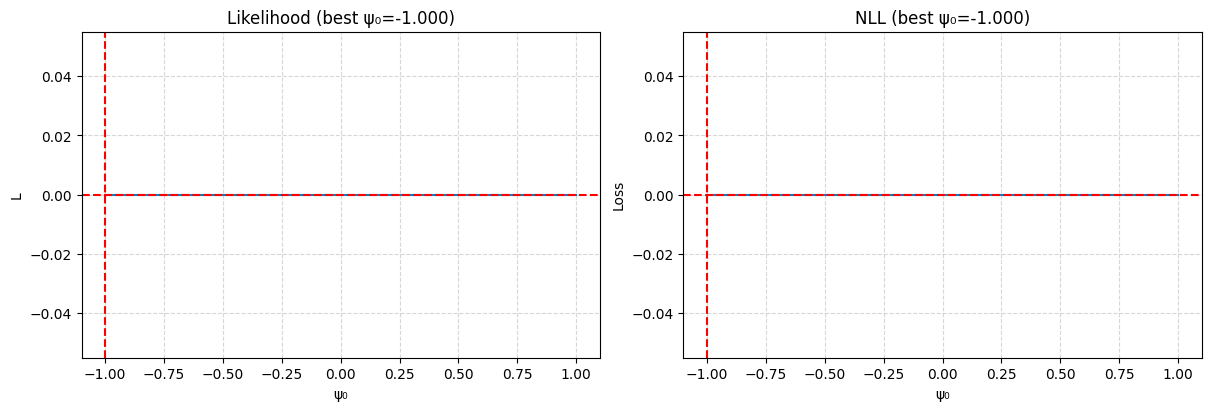

In [17]:
from Skripte.Vjezba5.plot import *
plot_losses_b_over_psi0("Skripte/Vjezba5/diabetes_dataset.csv")

---

## Višeklasna klasifikacija



<font color='red'>
    
## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

U višeklasnoj klasifikaciji koristi se sljedeća funkcija gubitka:

\begin{align}
L[\phi]
= - \sum_{i=1}^{I} \log\!\big[\, \operatorname{softmax}_{y_i}\!\big(\mathbf{f}[\mathbf{x}_i,\phi]\big) \big]
= - \sum_{i=1}^{I} \left( f_{y_i}[\mathbf{x}_i,\phi]
   - \log \sum_{k'=1}^{K} \exp\!\big( f_{k'}[\mathbf{x}_i,\phi] \big) \right)
\end{align}

koja u sebi sadrži softmax funkciju:

\begin{align}
\operatorname{softmax}_k[\mathbf{z}]
= \frac{\exp(z_k)}{\displaystyle \sum_{k'=1}^{K} \exp(z_{k'})}
\end{align}

Vaš je zadatak proučiti ime funkcije **Cross Entropy** te razumjeti i argumentirati što radi softmax funkcija.